# **Projet P6 - révisions et pratique**

Vous allez travailler sur des données extraites de IMDB. Cela vous permettra si vous les souhaitez (plus tard!) d'inclure ce travail à votre projet TheMoviePredictor que vous faites avec Arnaud dans lequel vous récupérez justement ces données et construisez votre base. La variable d'intérêt sera la notation IMDB des films pour pouvoir déterminer. En effet le succès commercial d'un film n'implique pas nécessairement sa qualité et il convient donc d'aller chercher plus loin que le simple profit dégagé d'une production cinématographique...
À vous !!

Les **objectifs** de ce projet sont multiples :
1. Réviser
2. Pratiquer
3. Vous auto-évaluer et vous évaluer (pour nous)
4. Vous rassurer et vous permettre de réaliser ce que vous savez faire pour pouvoir en parler

## **1. Import des libraries**

**À FAIRE**

> Importer dans la cellule l'ensemble des librairies nécessaires à votre travail. L'idée n'est pas de savoir immédiatement tout ce dont vous aurez besoin mais de faire des aller-retours pour y ajouter vos librairies petit à petit. L'intérêt est une meilleure lisibilité pour un lecteur extérieur qui, en quelques lignes d'import, pourra déjà avoir une idée de ce qui a été fait.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.api import OLS, add_constant

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

#from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
#from sklearn.impute import SimpleImputer
#from sklearn.compose import ColumnTransformer,make_column_selector

## **2. Import des données**

**À FAIRE**

> Importer les données `5000_movies.csv` disponible à la racine de ce document.  
> Afficher les 7 premières lignes et **toutes** les colonnes.    
> Répondre aux questions suivantes (répondez à toutes les questions dans une seule cellule Markdown mais évidemment le code vous ayant permis d'extraire ces informations doit être présent):
>- combien y a-t-il d'observations/de variables ?
>- sur combien d'années se répartissent les données ?
>- combien de pays sont représentés ?
>- combien de réalisateurs différents dans la base ?
>- combien d'acteurs et d'actrices différentes ?

In [2]:
data = pd.read_csv('5000_movies_bis.csv')
data.head(7)

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [3]:
# pour afficher toutes les colonnes on peut gérer les options d'affichage de pandas
pd.set_option('display.max_columns', 100)
data.head(7)

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [4]:
data.shape

(5043, 28)

In [5]:
data.director_name.unique().shape

(2399,)

In [6]:
max(data.title_year)-min(data.title_year)

100.0

In [7]:
data.country.nunique(dropna=True)

65

In [8]:
actors = pd.Series(data[['actor_1_name','actor_2_name','actor_3_name']].values.flatten())
actors.nunique(dropna=True)

6255

## **3. Nettoyage des données**

**À FAIRE**

> Vous allez dans cette partie vous occuper de faire les opérations de nettoyage sur les données. Cela implique donc de regarder en détail :
>- les doublons
>- les variables (à supprimer, à modifier etc...)
>- les valeurs manquantes
>- les zéros
> 
>Ajouter une courte explication des décisions que vous prendrez (gestion des valeurs manquantes, suppression ou modification de certaines variables, etc...).

#### **Les doublons**

In [9]:
sum(data.duplicated())

45

In [10]:
data.drop_duplicates(inplace=True)
data.shape

(4998, 28)

In [11]:
# Visualisation des doublons
data = data.sort_values(by=['movie_title','num_voted_users'], ascending=[True,False])

data[data.groupby('movie_title')['movie_title'].transform('size') > 1]#.head()

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
4894,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,618.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,James Mason,"20,000 Leagues Under the Sea",22124,800,Paul Lukas,0.0,captain|expedition|sea|submarine|whale,http://www.imdb.com/title/tt0046672/?ref_=fn_t...,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
3711,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,617.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,James Mason,"20,000 Leagues Under the Sea",22123,799,Paul Lukas,0.0,captain|expedition|sea|submarine|whale,http://www.imdb.com/title/tt0046672/?ref_=fn_t...,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
4352,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,Johnny Depp,A Nightmare on Elm Street,149293,42918,Amanda Wyss,1.0,freddy krueger|lucid dream|serial killer|slash...,http://www.imdb.com/title/tt0087800/?ref_=fn_t...,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
1420,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,Johnny Depp,A Nightmare on Elm Street,149285,42918,Amanda Wyss,1.0,freddy krueger|lucid dream|serial killer|slash...,http://www.imdb.com/title/tt0087800/?ref_=fn_t...,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
4842,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,Jim Sturgess,Across the Universe,91863,5405,Robert Clohessy,0.0,anti war|liverpool|love|protest|song,http://www.imdb.com/title/tt0445922/?ref_=fn_t...,524.0,English,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,Color,Catherine Hardwicke,350.0,122.0,308.0,10000.0,Taylor Lautner,17000.0,191449475.0,Drama|Fantasy|Romance,Kristen Stewart,Twilight,348007,44060,Anna Kendrick,1.0,blood|high school|love|school|vampire,http://www.imdb.com/title/tt1099212/?ref_=fn_t...,1535.0,English,USA,PG-13,37000000.0,2008.0,12000.0,5.2,2.35,19000
3981,Color,Jaume Collet-Serra,349.0,113.0,174.0,767.0,Frank Langella,14000.0,61094903.0,Action|Mystery|Thriller,Liam Neeson,Unknown,210548,17151,Aidan Quinn,3.0,agriculture|airport|amnesia|nurse|scientist,http://www.imdb.com/title/tt1401152/?ref_=fn_t...,332.0,English,UK,PG-13,30000000.0,2011.0,902.0,6.9,2.35,29000
1232,Color,Jaume Collet-Serra,349.0,113.0,174.0,767.0,Frank Langella,14000.0,61094903.0,Action|Mystery|Thriller,Liam Neeson,Unknown,210542,17152,Aidan Quinn,3.0,agriculture|airport|amnesia|nurse|scientist,http://www.imdb.com/title/tt1401152/?ref_=fn_t...,332.0,English,UK,PG-13,30000000.0,2011.0,903.0,6.9,2.35,29000
2099,Color,Paul McGuigan,159.0,110.0,118.0,287.0,Spencer Wilding,11000.0,5773519.0,Drama|Horror|Sci-Fi|Thriller,Daniel Radcliffe,Victor Frankenstein,28621,12876,Daniel Mays,2.0,assistant|experiment|frankenstein|medical stud...,http://www.imdb.com/title/tt1976009/?ref_=fn_t...,91.0,English,USA,PG-13,40000000.0,2015.0,1000.0,6.0,2.35,11000


In [12]:
# Suppression des doublons
data.drop_duplicates(subset=['director_name', \
                           'movie_title', \
                           'title_year'], keep="first", inplace=True)

len(data)

4919

#### **Suppression de variables**

In [13]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_fb_likes', 'actor_3_fb_likes', 'actor_2_name',
       'actor_1_fb_likes', 'gross', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_fb_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_fb_likes', 'imdb_score',
       'aspect_ratio', 'movie_fb_likes'],
      dtype='object')

La variable `plot_keywords` pourrait être utile mais sera compliquée à gérer.  
La variable `movie_imdb_link` n'a aucun intérêt pour nous ici. Enfin elle a quand même servi pour aller scraper quelques infos supplémentaires sur IMDB mais maintenant que c'est fait, plus besoin.  
On peut donc d'ores et déjà se séparer de ces 2 variables.

In [14]:
data.drop(['plot_keywords', 'movie_imdb_link'], axis=1, inplace=True)
data.shape

(4919, 26)

#### **Les valeurs manquantes et les zéros**

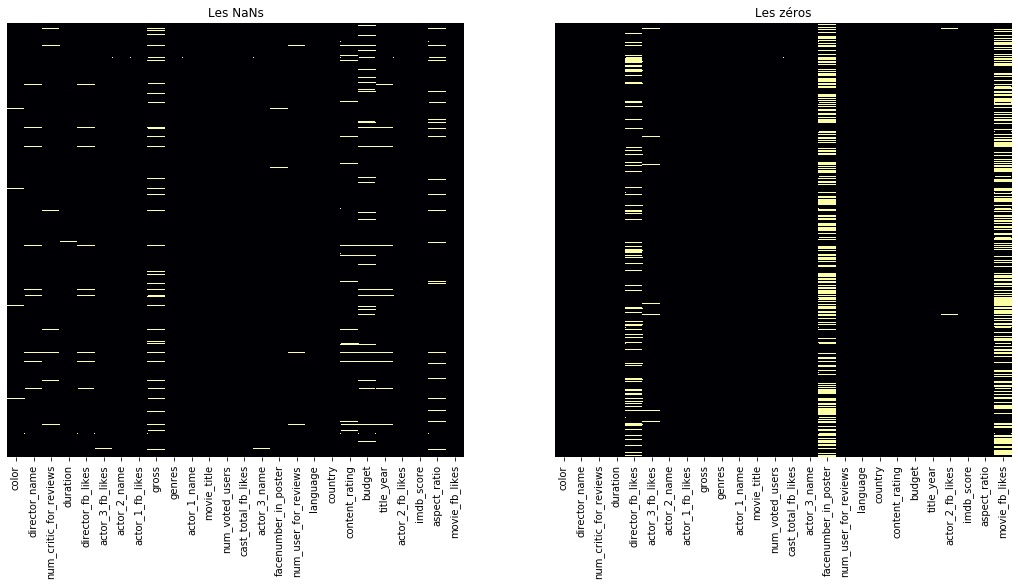

In [15]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='inferno', ax=ax[0])
ax[0].set_title('Les NaNs')
sns.heatmap(data==0, yticklabels=False, cbar=False, cmap='inferno', ax=ax[1])
ax[1].set_title('Les zéros');

**Gestion des zéros**

La plupart des zéros sont des valeurs manquantes vraisemblablement, à l'exception de ceux de la variable `facenumber_in_poster`. On les remplace par des NaN.

In [16]:
#sélection et affichage des variables contenant des 0 sauf facenumber_in_poster
cols = data.columns[(data==0).any()].drop('facenumber_in_poster')

#remplacement des 0 par des nan
data[cols] = data[cols].replace(0, np.nan)

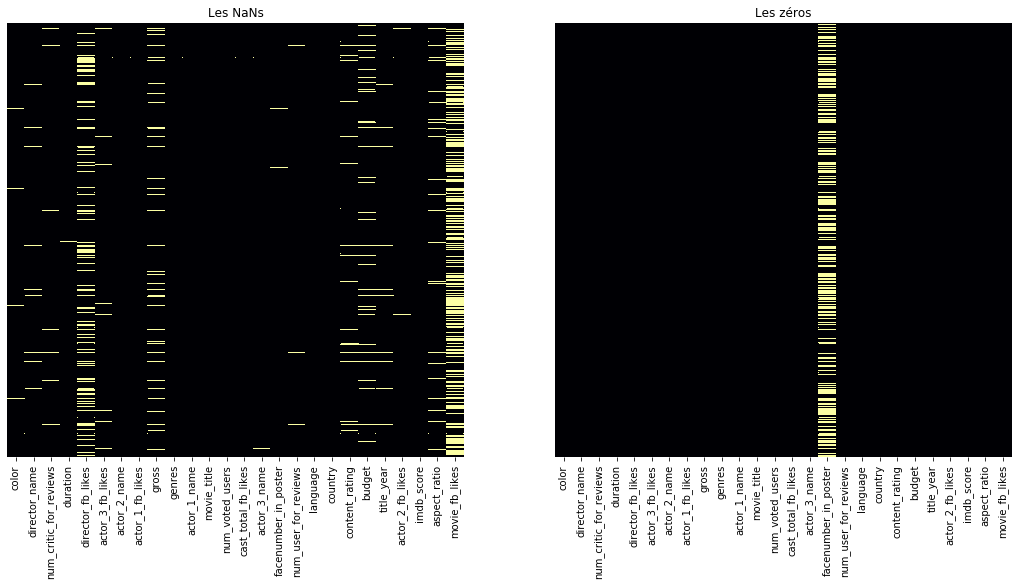

In [17]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='inferno', ax=ax[0])
ax[0].set_title('Les NaNs')
sns.heatmap(data==0, yticklabels=False, cbar=False, cmap='inferno', ax=ax[1])
ax[1].set_title('Les zéros');

**Gestion des NaN**

In [18]:
data.isnull().sum().sort_values(ascending=False)/len(data)

movie_fb_likes            0.433218
director_fb_likes         0.199431
gross                     0.093718
budget                    0.080707
aspect_ratio              0.066274
content_rating            0.061191
actor_3_fb_likes          0.022769
title_year                0.021549
director_name             0.020736
actor_2_fb_likes          0.013824
num_critic_for_reviews    0.009961
cast_total_fb_likes       0.006709
actor_1_fb_likes          0.006709
actor_3_name              0.004676
num_user_for_reviews      0.004269
color                     0.003863
duration                  0.003049
actor_2_name              0.002643
facenumber_in_poster      0.002643
language                  0.002440
actor_1_name              0.001423
country                   0.001016
genres                    0.000000
movie_title               0.000000
imdb_score                0.000000
num_voted_users           0.000000
dtype: float64

`movie_fb_likes` et `director_fb_likes` ont trop de valeurs manquantes et supprimer les lignes diminuerait de manière trop importante la taille de notre dataset. On ne conserve donc pas ces variables.

In [19]:
# suppression 
data.drop(['movie_fb_likes', 'director_fb_likes'], axis=1, inplace=True)
data.shape

(4919, 24)

**Dans le dataset initial (5000_movies.csv)**, il y a beaucoup de valeurs manquantes dans `gross` et dans `budget` donc imputation délicate mais comme on veut garder ces variables, on va supprimer les lignes.

Avant cette suppression on pourrait essayer de scraper IMDB pour obtenir des informations supplémentaires. Pour cela il faut revenir un peu en arrière pour ne pas supprimer la colonne `movie_imdb_link` que l'on va utiliser pour aller chercher les infos. La cellule ci-dessous permet de récupérer les données supplémentaires éventuelles, de les ajouter dans les colonnes `gross` et `budget` du dataframe `data`. Comme l'éxecution est un peu longue, on va sauvegarder ce dataframe dans un nouveau csv pour ne pas avoir à le refaire à chaque fois.

In [20]:
# Le code ci-dessous permet de scrapper les données sur IMDB.
# Il est un peu long à éxecuter donc je vous ai sauvegardé un nouveau fichier 5000_movies_bis.csv avec les données scrappées en plus
# On recommence le notebook avec le nouveau jeu de données
"""
from urllib.request import urlopen
from bs4 import BeautifulSoup

def scrap_gross(row):
    link = row['movie_imdb_link']
    if np.isnan(row['gross']):
        page = urlopen(link).read()
        soup = BeautifulSoup(page)
        for h4 in soup.find_all('h4', {'class':'inline'}):
            if "Cumulative Worldwide Gross:" in h4:
                return float(h4.next_sibling.strip().replace("$","").replace(",",""))
    else:
        return row['gross']
    
def scrap_budget(row):
    link = row['movie_imdb_link']
    if np.isnan(row['budget']):
        page = urlopen(link).read()
        soup = BeautifulSoup(page)
        for h4 in soup.find_all('h4', {'class':'inline'}):
            if "Budget:" in h4:
                return float(h4.next_sibling.strip().replace("$","").replace(",","").replace("EUR","")) #il faudrait convertir la valeur € en $ pour bien faire...
    else:
        return row['budget']
    
data['budget'] = data.apply(scrap_budget, axis=1)
data['gross'] = data.apply(scrap_gross, axis=1)

data.to_csv('5000_movies_bis.csv', index=False)
"""

'\nfrom urllib.request import urlopen\nfrom bs4 import BeautifulSoup\n\ndef scrap_gross(row):\n    link = row[\'movie_imdb_link\']\n    if np.isnan(row[\'gross\']):\n        page = urlopen(link).read()\n        soup = BeautifulSoup(page)\n        for h4 in soup.find_all(\'h4\', {\'class\':\'inline\'}):\n            if "Cumulative Worldwide Gross:" in h4:\n                return float(h4.next_sibling.strip().replace("$","").replace(",",""))\n    else:\n        return row[\'gross\']\n    \ndef scrap_budget(row):\n    link = row[\'movie_imdb_link\']\n    if np.isnan(row[\'budget\']):\n        page = urlopen(link).read()\n        soup = BeautifulSoup(page)\n        for h4 in soup.find_all(\'h4\', {\'class\':\'inline\'}):\n            if "Budget:" in h4:\n                return float(h4.next_sibling.strip().replace("$","").replace(",","").replace("EUR","")) #il faudrait convertir la valeur € en $ pour bien faire...\n    else:\n        return row[\'budget\']\n    \ndata[\'budget\'] = data.ap

In [21]:
data.dropna(subset=['gross', 'budget'], inplace=True)
data.shape

(4213, 24)

In [22]:
# Pourcentage d'observations écartées :
round((4919-4213)/4919,2)

0.14

In [23]:
# nombre d'observations encore incomplètes: 
4213-data.dropna().shape[0]

262

`aspect_ratio` est la 3ème variable avec le plus de NaN. Une rapide recherche et on trouve que c'est le rapport de la largeur sur la hauteur de l'image. Probablement un intérêt limité dans notre cas mais on vérifie avant de décider si on la conserve.

In [24]:
data.aspect_ratio.value_counts()

2.35     2119
1.85     1717
1.37       67
1.66       52
1.78       52
1.33       24
2.39       12
2.20       11
2.00        3
16.00       3
2.76        3
2.40        3
1.75        3
2.24        1
1.18        1
1.77        1
1.50        1
2.55        1
Name: aspect_ratio, dtype: int64

In [25]:
# Principalement 2.35 et 1.85, on regroupe les autres valeurs sous une seule modalité et on va calculer la moyenne et la variance du score de chaque sous-groupe
print(
    'Les moyennes des 3 groupes sont :',
    data.imdb_score[data.aspect_ratio==2.35].mean(),
    data.imdb_score[data.aspect_ratio==1.85].mean(),
    data.imdb_score[(data.aspect_ratio!=2.35)&(data.aspect_ratio!=1.85)].mean()
)

print(
    'Les variances des 3 groupes sont :',
    data.imdb_score[data.aspect_ratio==2.35].std()**2,
    data.imdb_score[data.aspect_ratio==1.85].std()**2,
    data.imdb_score[(data.aspect_ratio!=2.35)&(data.aspect_ratio!=1.85)].std()**2
)

Les moyennes des 3 groupes sont : 6.49513921661161 6.374257425742587 6.520424403183026
Les variances des 3 groupes sont : 0.981756342743686 1.2734628078192398 1.590672159828429


In [26]:
# Étant données les moyennes et variances très proches des 3 groupes, on peut supprimer cette variable de notre analyse sans que cela affecte les résultats.
data.drop('aspect_ratio', axis=1, inplace=True)
data.shape

(4213, 23)

`content_rating` est la 4ème variable avec le plus de NaN. On souhaite conserver cette variable en revanche on pourra difficilement faire de l'imputation de valeurs qui a du sens donc on choisit de supprimer les lignes.

In [27]:
data.dropna(subset=['content_rating'], inplace=True)
data.shape

(4101, 23)

In [28]:
data.isnull().sum().sort_values(ascending=False)

actor_3_fb_likes          46
actor_2_fb_likes          21
facenumber_in_poster       9
actor_3_name               7
actor_1_fb_likes           6
cast_total_fb_likes        6
num_critic_for_reviews     5
color                      4
language                   3
num_user_for_reviews       2
actor_2_name               2
title_year                 1
director_name              1
duration                   1
actor_1_name               1
imdb_score                 0
gross                      0
genres                     0
movie_title                0
country                    0
content_rating             0
budget                     0
num_voted_users            0
dtype: int64

On peut regarder certaines variables "à la main" car on pourra trouver les informations facilement.

In [29]:
# facenumber_in_poster
data[data.facenumber_in_poster.isna()]

,color,director_name,num_critic_for_reviews,duration,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score
1948,NaN,Lasse Hallström,162.0,108.0,690.0,Henry Thomas,17000.0,80014842.0,Drama|Romance|War,Channing Tatum,Dear John,104356,19945.0,Scott Porter,NaN,186.0,English,USA,PG-13,25000000.0,2010.0,861.0,6.3
4444,Color,Frank Lotito,NaN,102.0,259.0,Jake Busey,3000.0,35312.0,Comedy|Drama|Family,Brighton Sharbino,Growing Up Smith,108,4320.0,Tim Guinee,NaN,1.0,English,USA,PG-13,2000000.0,2015.0,660.0,8.2
3016,Color,Randall Wallace,82.0,99.0,79.0,Connor Corum,399.0,91443253.0,Biography|Drama,Jacob Vargas,Heaven Is for Real,21034,663.0,Rob Moran,NaN,153.0,English,USA,PG,12000000.0,2014.0,116.0,5.8
3373,Color,Justin Tipping,6.0,80.0,102.0,Natalie Stephany Aguilar,861.0,150191.0,Adventure,Tina Gilton,Kicks,59,1279.0,Justin Hall,NaN,6.0,English,USA,R,2000000.0,2016.0,163.0,7.8
3853,Color,Andrew Erwin,49.0,98.0,402.0,Sarah Drew,589.0,10429707.0,Comedy,Alex Kendrick,Moms' Night Out,10483,2705.0,Patricia Heaton,NaN,125.0,English,USA,PG,5000000.0,2014.0,416.0,5.4
248,Color,Dave Green,181.0,112.0,799.0,Noel Fisher,5000.0,81638674.0,Action|Adventure|Comedy|Sci-Fi,Stephen Amell,Teenage Mutant Ninja Turtles: Out of the Shadows,17533,8306.0,Brad Garrett,NaN,115.0,English,USA,PG-13,135000000.0,2016.0,833.0,6.3
99,Color,Peter Jackson,645.0,182.0,773.0,Adam Brown,5000.0,303001229.0,Adventure|Fantasy,Aidan Turner,The Hobbit: An Unexpected Journey,637246,9152.0,James Nesbitt,NaN,1367.0,English,USA,PG-13,180000000.0,2012.0,972.0,7.9
4692,Color,Caryn Waechter,23.0,104.0,195.0,Kara Hayward,601.0,6870.0,Drama|Mystery|Thriller,Laura Fraser,The Sisterhood of Night,1354,1581.0,Louis Ozawa Changchien,NaN,17.0,English,USA,PG-13,1000000.0,2014.0,524.0,6.3
3797,Color,M. Night Shyamalan,371.0,94.0,99.0,Patch Darragh,432.0,65069140.0,Horror|Thriller,Ocean James,The Visit,65299,1010.0,Olivia DeJonge,NaN,455.0,English,USA,PG-13,5000000.0,2015.0,309.0,6.2


In [30]:
# il y en a que 9, exceptionnellement on peut aller voir les affiches des films ça va aller vite
data.loc[99,'facenumber_in_poster'] = 1 #hobbit
data.loc[248,'facenumber_in_poster'] = 8 #tortues ninja
data.loc[1948,'facenumber_in_poster'] = 2 #dear john
data.loc[3016,'facenumber_in_poster'] = 2 #heaven
data.loc[3373,'facenumber_in_poster'] = 0 #kicks
data.loc[3797,'facenumber_in_poster'] = 0 #the visit
data.loc[3853,'facenumber_in_poster'] = 6 #mom's night out
data.loc[4444,'facenumber_in_poster'] = 4 #Growing Up Smith
data.loc[4692,'facenumber_in_poster'] = 4 #The Sisterhood of Night

In [31]:
# color
data[data.color.isna()]

,color,director_name,num_critic_for_reviews,duration,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score
1948,NaN,Lasse Hallström,162.0,108.0,690.0,Henry Thomas,17000.0,80014842.0,Drama|Romance|War,Channing Tatum,Dear John,104356,19945.0,Scott Porter,2.0,186.0,English,USA,PG-13,25000000.0,2010.0,861.0,6.3
2015,NaN,Mario Van Peebles,7.0,100.0,399.0,Mario Van Peebles,668.0,7289.0,Action|Thriller,Martin Kove,Red Sky,1084,2204.0,Jacob Vargas,0.0,11.0,English,USA,PG-13,25000000.0,2014.0,535.0,4.1
2753,NaN,Tung-Shing Yee,53.0,119.0,19.0,Daniel Wu,556.0,5461200.0,Action|Crime|Drama|Thriller,Bingbing Fan,Shinjuku Incident,9177,996.0,Yasuaki Kurata,4.0,53.0,Mandarin,Hong Kong,R,15000000.0,2009.0,353.0,7.1
3638,NaN,Wayne Wang,56.0,104.0,451.0,Russell Wong,974.0,1346503.0,Drama|History,Bingbing Li,Snow Flower and the Secret Fan,3024,2430.0,Ji-hyun Jun,0.0,22.0,English,China,PG-13,6000000.0,2011.0,595.0,6.1


In [32]:
# les 4 valeurs manquantes correspondent à des films récents et en couleur
data.loc[data.color.isna(), 'color'] = 'Color'

In [33]:
# language
data[data.language.isna()]

,color,director_name,num_critic_for_reviews,duration,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score
4110,Color,Michael Landon Jr.,5.0,87.0,331.0,Kevin Gage,702.0,252726.0,Drama|Family|Western,William Morgan Sheppard,Love's Abiding Joy,1289,2715.0,Brianna Brown,0.0,18.0,NaN,USA,PG,3000000.0,2006.0,366.0,7.2
3086,Color,Christopher Cain,43.0,111.0,258.0,Taylor Handley,482.0,1066555.0,Drama|History|Romance|Western,Jon Gries,September Dawn,2618,1526.0,Trent Ford,0.0,111.0,NaN,USA,R,11000000.0,2007.0,362.0,5.8
3869,Color,Mel Brooks,39.0,87.0,753.0,Dom DeLuise,898.0,36145695.0,Comedy|Romance,Sid Caesar,Silent Movie,12666,2951.0,Bernadette Peters,0.0,61.0,NaN,USA,PG,4400000.0,1976.0,842.0,6.7


In [34]:
# les 3 valeurs manquantes correspondent à des films américains
data.loc[data.language.isna(), 'language'] = 'English'

In [35]:
#title_year
data[data.title_year.isna()]

,color,director_name,num_critic_for_reviews,duration,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score
2466,Color,NaN,108.0,334.0,30.0,Nora von Waldstätten,897.0,145118.0,Biography|Crime|Drama|Thriller,Edgar Ramírez,Carlos,10111,1032.0,Katharina Schüttler,0.0,36.0,English,France,Not Rated,18000000.0,NaN,30.0,7.7


In [36]:
# 1 valeur manquante pour le film Carlos qui date de 2010
data.loc[2466, 'title_year'] = 2010

On regarde un peu plus en détails les histoires de likes facebook. Notamment la correlation entre ces variables.

In [37]:
data[['cast_total_fb_likes', 'actor_1_fb_likes', 'actor_2_fb_likes', 'actor_3_fb_likes', 'imdb_score']].corr()

,cast_total_fb_likes,actor_1_fb_likes,actor_2_fb_likes,actor_3_fb_likes,imdb_score
cast_total_fb_likes,1.000000,0.948189,0.631376,0.476418,0.101156
actor_1_fb_likes,0.948189,1.000000,0.385004,0.248168,0.088768
actor_2_fb_likes,0.631376,0.385004,1.000000,0.542972,0.099078
actor_3_fb_likes,0.476418,0.248168,0.542972,1.000000,0.067876
imdb_score,0.101156,0.088768,0.099078,0.067876,1.000000


`cast_total_fb_likes` et `actor_1_fb_likes` sont très corrélées. Pour les 2 autres variables `actor_2_fb_likes` et `actor_3_fb_likes` on peut choisir de les supprimer pour les remplacer par une information `other_actors_fb_likes` = `cast_total_fb_likes` - `actor_1_fb_likes`, cela permettra de diminuer le nombre de valeurs manquantes.

In [38]:
# calcul de other_actors_fb_likes
data['other_actors_fb_likes'] = data.cast_total_fb_likes - data.actor_1_fb_likes

In [39]:
# suppression variables redondantes
data.drop(['cast_total_fb_likes', 'actor_2_fb_likes', 'actor_3_fb_likes'], axis=1, inplace=True)
data.shape

(4101, 21)

In [40]:
data.isnull().sum().sort_values(ascending=False)

actor_3_name              7
other_actors_fb_likes     6
actor_1_fb_likes          6
num_critic_for_reviews    5
actor_2_name              2
num_user_for_reviews      2
actor_1_name              1
director_name             1
duration                  1
gross                     0
genres                    0
num_voted_users           0
movie_title               0
imdb_score                0
facenumber_in_poster      0
language                  0
country                   0
content_rating            0
budget                    0
title_year                0
color                     0
dtype: int64

Finalement, pour les 6 lignes ayant des valeurs manquantes restantes pour les likes facebook on peut imputer la moyenne.  
Idem pour num_critic_for_reviews, num_user_for_reviews et duration.  
Quant aux noms d'acteurs/réalisateurs, comme on ne les gardera pas pour la partie modélisation mais uniquement pour la visualisation (on reviendra dessus le moment venu), on peut les conserver tels quels pour le moment.

In [41]:
#imputation de la moyenne pour quelques valeurs manquantes
data.loc[data.other_actors_fb_likes.isna(),'other_actors_fb_likes'] = data.other_actors_fb_likes.mean()
data.loc[data.actor_1_fb_likes.isna(),'actor_1_fb_likes'] = data.actor_1_fb_likes.mean()
data.loc[data.num_critic_for_reviews.isna(),'num_critic_for_reviews'] = data.num_critic_for_reviews.mean()
data.loc[data.num_user_for_reviews.isna(),'num_user_for_reviews'] = data.num_user_for_reviews.mean()
data.loc[data.duration.isna(),'duration'] = data.duration.mean()

In [42]:
# on reset l'index après toutes les suppressions de lignes
data.reset_index(drop=True, inplace=True)

#### **Modification de variables**

In [43]:
data.head()

,color,director_name,num_critic_for_reviews,duration,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,other_actors_fb_likes
0,Color,Dan Trachtenberg,411.0,104.0,John Gallagher Jr.,14000.0,71897215.0,Drama|Horror|Mystery|Sci-Fi|Thriller,Bradley Cooper,10 Cloverfield Lane,126893,Sumalee Montano,0.0,440.0,English,USA,PG-13,15000000.0,2016.0,7.3,504.0
1,Color,Timothy Hines,1.0,111.0,Kelly LeBrock,1000.0,14616.0,Drama,Christopher Lambert,10 Days in a Madhouse,314,Alexandra Callas,1.0,10.0,English,USA,R,12000000.0,2015.0,7.5,1059.0
2,Color,Gil Junger,133.0,97.0,Heath Ledger,23000.0,38176108.0,Comedy|Drama|Romance,Joseph Gordon-Levitt,10 Things I Hate About You,222099,Andrew Keegan,6.0,549.0,English,USA,PG-13,16000000.0,1999.0,7.2,14907.0
3,Color,Kevin Lima,84.0,100.0,Eric Idle,2000.0,66941559.0,Adventure|Comedy|Family,Ioan Gruffudd,102 Dalmatians,26413,Jim Carter,1.0,77.0,English,USA,G,85000000.0,2000.0,4.8,2182.0
4,Color,Robert Moresco,26.0,107.0,Brad Renfro,954.0,53481.0,Crime|Drama|Thriller,Brian Dennehy,10th & Wolf,5557,Dash Mihok,5.0,34.0,English,USA,R,8000000.0,2006.0,6.4,1558.0


In [49]:
# affichage des valeurs pour voir s'il n'y a pas de caractères spéciaux qui se baladent.
data.loc[64].values

array(['Color', 'Michael Polish', 12.0, 121.0, 'Bobby Batson', 4000.0,
       4700361.0, 'Drama', 'Hayden Christensen', '90 Minutes in Heaven',
       2047, 'Cynthia Barrett', 0.0, 29.0, 'English', 'USA', 'PG-13',
       5000000.0, 2015.0, 4.6, 2617.0], dtype=object)

In [47]:
# c'est pas évident à voir mais il y a bien un \xa0 louche après les titres des films
data.movie_title = data.movie_title.apply(lambda row : row.replace('\xa0',''))

On va regarder plus en détail la variable `content_rating`.

In [50]:
data.content_rating.value_counts()

R            1880
PG-13        1336
PG            624
G             103
Not Rated      75
Unrated        34
Approved       20
X              11
NC-17           7
Passed          4
M               3
GP              3
TV-14           1
Name: content_rating, dtype: int64

Une petite recherche et on trouve que historiquement, on a plus ou moins :
- Passed = Approved = M = GP = PG
- TV-14 = PG-13
- X = NC-17
- Not Rated = Unrated = NR

On veut donc remplacer :
- Passed, Approved, M et GP par **PG**
- TV-14 par **PG-13**
- X par **NC-17**
- Not Rated et Unrated par **UR** qui sont les notations utilisées aujourd'hui.

In [51]:
def replace_rating(row):
    if row['content_rating'] in ['Passed', 'Approved', 'M', 'GP']:
        return 'PG'
    elif row['content_rating'] in ['Not Rated', 'Unrated']:
        return 'UR'
    elif row['content_rating'] == 'X':
        return 'NC-17'
    elif row['content_rating'] == 'TV-14':
        return 'PG-13'
    else:
        return row['content_rating']
    
data['content_rating'] = data.apply(replace_rating, axis=1)
data.content_rating.value_counts()

R        1880
PG-13    1337
PG        654
UR        109
G         103
NC-17      18
Name: content_rating, dtype: int64

On a déjà géré presque tout, le dernier point en suspens est la variable `genre` qu'il faut spliter puis créer des OneHotEncoded variables.

In [52]:
genre_dummies = data.genres.str.get_dummies('|')
data = pd.concat([data,genre_dummies], axis=1)
data.drop(['genres'], axis=1, inplace=True)
data

,color,director_name,num_critic_for_reviews,duration,actor_2_name,actor_1_fb_likes,gross,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,other_actors_fb_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Color,Dan Trachtenberg,411.0,104.0,John Gallagher Jr.,14000.0,71897215.0,Bradley Cooper,10 Cloverfield Lane,126893,Sumalee Montano,0.0,440.0,English,USA,PG-13,15000000.0,2016.0,7.3,504.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0
1,Color,Timothy Hines,1.0,111.0,Kelly LeBrock,1000.0,14616.0,Christopher Lambert,10 Days in a Madhouse,314,Alexandra Callas,1.0,10.0,English,USA,R,12000000.0,2015.0,7.5,1059.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Color,Gil Junger,133.0,97.0,Heath Ledger,23000.0,38176108.0,Joseph Gordon-Levitt,10 Things I Hate About You,222099,Andrew Keegan,6.0,549.0,English,USA,PG-13,16000000.0,1999.0,7.2,14907.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Color,Kevin Lima,84.0,100.0,Eric Idle,2000.0,66941559.0,Ioan Gruffudd,102 Dalmatians,26413,Jim Carter,1.0,77.0,English,USA,G,85000000.0,2000.0,4.8,2182.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Color,Robert Moresco,26.0,107.0,Brad Renfro,954.0,53481.0,Brian Dennehy,10th & Wolf,5557,Dash Mihok,5.0,34.0,English,USA,R,8000000.0,2006.0,6.4,1558.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,Color,Jaume Balagueró,252.0,78.0,Pablo Rosso,120.0,32511655.0,Manuela Velasco,[Rec],131462,Carlos Lasarte,0.0,374.0,Spanish,Spain,R,1500000.0,2007.0,7.5,25.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4097,Color,David Cronenberg,196.0,115.0,Sarah Polley,1000.0,2840417.0,Jennifer Jason Leigh,eXistenZ,77493,Callum Rennie,0.0,527.0,English,Canada,R,31000000.0,1999.0,6.8,1990.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4098,Color,Lee Tamahori,77.0,101.0,Nona Gaye,287.0,26082914.0,Sunny Mabrey,xXx: State of the Union,51349,Xzibit,2.0,213.0,English,USA,PG-13,87000000.0,2005.0,4.3,706.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4099,Color,Rob Cohen,191.0,132.0,Eve,14000.0,141204016.0,Vin Diesel,xXx,142569,Leila Arcieri,0.0,737.0,English,USA,PG-13,70000000.0,2002.0,5.8,790.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
data.language.value_counts()

English       3910
French          39
Spanish         31
Mandarin        17
Japanese        13
German          11
Italian          8
Hindi            7
Cantonese        7
Korean           6
Portuguese       6
Russian          5
Norwegian        4
Persian          4
Danish           3
Dutch            3
Thai             3
Aboriginal       2
None             2
Dari             2
Indonesian       2
Hebrew           2
Arabic           2
Maya             1
Swedish          1
Zulu             1
Mongolian        1
Kazakh           1
Romanian         1
Bosnian          1
Filipino         1
Vietnamese       1
Hungarian        1
Czech            1
Aramaic          1
Name: language, dtype: int64

In [54]:
def replace_language(row):
    if row['language'] in ['French', 'Spanish', 'German', 'Italian', 'Portuguese', 'Norwegian', 'Dutch',
                           'Danish', 'Romanian', 'Bosnian', 'Czech', 'Hungarian', 'Swedish']:
        return 'European'
    elif row['language'] == 'English':
        return 'English'
    else:
        return 'Other languages'
    
data['language'] = data.apply(replace_language, axis=1)
data.language.value_counts()

English            3910
European            110
Other languages      81
Name: language, dtype: int64

In [55]:
data.country.value_counts()

USA               3189
UK                 359
France             117
Canada              84
Germany             83
Australia           45
Spain               27
Japan               18
Italy               15
China               15
Hong Kong           14
Mexico              12
New Zealand         11
South Korea         10
Denmark              9
Ireland              8
Norway               7
South Africa         7
India                7
Brazil               6
Russia               6
Netherlands          4
Argentina            4
Iran                 4
Thailand             4
Czech Republic       3
Hungary              2
Israel               2
Taiwan               2
Belgium              2
West Germany         2
Romania              2
Peru                 1
Afghanistan          1
Finland              1
Egypt                1
Poland               1
Aruba                1
Philippines          1
Soviet Union         1
Colombia             1
Chile                1
Iceland              1
New Line   

In [56]:
def replace_country(row):
    if row['country'] in ['UK', 'France', 'Spain', 'Germany', 'West Germany', 'Italy', 'Portugal', 'Norway', 'Netherlands',
                        'Denmark', 'Ireland', 'Romania', 'Iceland', 'Czech', 'Hungary', 'Sweden', 'Belgium', 'Greece',
                        'Bulgaria', 'Switzerland', 'Poland', 'Finland']:
        return 'Europe'
    elif row['country'] in ['USA', 'Canada']:
        return 'North America'
    else:
        return 'Other countries'
    
data['country'] = data.apply(replace_country, axis=1)
data.country.value_counts()

North America      3273
Europe              644
Other countries     184
Name: country, dtype: int64

## **4. Analyse exploratoire**

Dans cette partie, vous devez "explorer" vos données. Cette tâche, qui peut s'avérer très vaste, consiste à s'intéresser à l'information contenue dans nos données "au premier abord".

Sont donc attendus dans cette partie :
>- quelques statistiques descriptives
>- entre 6 et 10 visualisations (vous pouvez bien sûr en regrouper plusieurs sur une même figure)
>- et pour chaque résultat/graphique présenté, une explication succinte

In [57]:
data.describe()

,num_critic_for_reviews,duration,actor_1_fb_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,other_actors_fb_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
count,4101.000000,4101.000000,4101.000000,4.101000e+03,4.101000e+03,4101.000000,4101.000000,4.101000e+03,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000
mean,155.763184,109.473659,7273.231990,4.752214e+07,9.660018e+04,1.371617,308.070017,4.213823e+07,2002.550597,6.447184,3484.729915,0.243843,0.199707,0.051695,0.064618,0.385516,0.185564,0.015362,0.506462,0.114119,0.128993,0.000732,0.041697,0.106559,0.043160,0.024872,0.100707,0.000488,0.224823,0.128749,0.038527,0.287979,0.041941,0.018044
std,120.962688,22.794716,15178.187323,6.701186e+07,1.470835e+05,2.034079,393.054175,2.164071e+08,10.901944,1.074816,6346.506204,0.429451,0.399829,0.221437,0.245881,0.486776,0.388802,0.123003,0.500019,0.317994,0.335233,0.027040,0.199921,0.308590,0.203242,0.155754,0.300977,0.022081,0.417517,0.334963,0.192489,0.452876,0.200479,0.133128
min,1.000000,20.000000,2.000000,1.130000e+02,2.200000e+01,0.000000,1.000000,2.180000e+02,1927.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,95.000000,697.000000,5.480318e+06,1.490400e+04,0.000000,93.000000,8.000000e+06,1999.000000,5.800000,815.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,127.000000,105.000000,1000.000000,2.507798e+07,4.558000e+04,1.000000,189.000000,2.000000e+07,2005.000000,6.500000,1769.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,211.000000,119.000000,12000.000000,6.057364e+07,1.130680e+05,2.000000,369.000000,4.800000e+07,2010.000000,7.200000,3032.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,813.000000,334.000000,640000.000000,7.605058e+08,1.689764e+06,43.000000,5060.000000,1.221550e+10,2016.000000,9.300000,139717.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


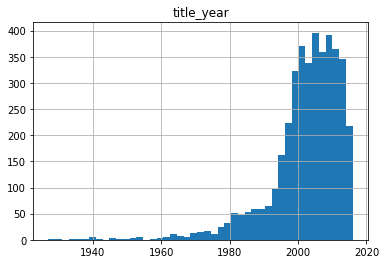

In [58]:
#historique des sorties de films
data.hist('title_year', bins=45);

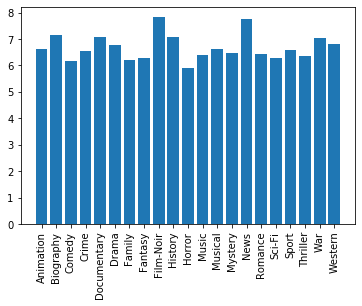

In [59]:
#Les moyennes par genre
mean_genre = {}
for gen in data.columns[-21:]:
    mean_genre[gen] = data.loc[data[gen]==1,'imdb_score'].mean()
    
plt.bar(mean_genre.keys(), mean_genre.values())
plt.xticks(rotation=90);

On peut regarder un peu le profit généré par les films pour cela on crée la variable `profit` = `gross` - `budget`

In [60]:
#Top 20 des films ayant généré le plus de profit
data['profit'] = data.gross - data.budget
top20profit = data[['movie_title', 'profit', 'budget']].sort_values('profit', ascending=False).iloc[:20].reset_index(drop=True)
top20profit

,movie_title,profit,budget
0,Avatar,523505847.0,237000000.0
1,Jurassic World,502177271.0,150000000.0
2,Titanic,458672302.0,200000000.0
3,Star Wars: Episode IV - A New Hope,449935665.0,11000000.0
4,E.T. the Extra-Terrestrial,424449459.0,10500000.0
5,The Avengers,403279547.0,220000000.0
6,The Lion King,377783777.0,45000000.0
7,Star Wars: Episode I - The Phantom Menace,359544677.0,115000000.0
8,The Dark Knight,348316061.0,185000000.0
9,The Hunger Games,329999255.0,78000000.0


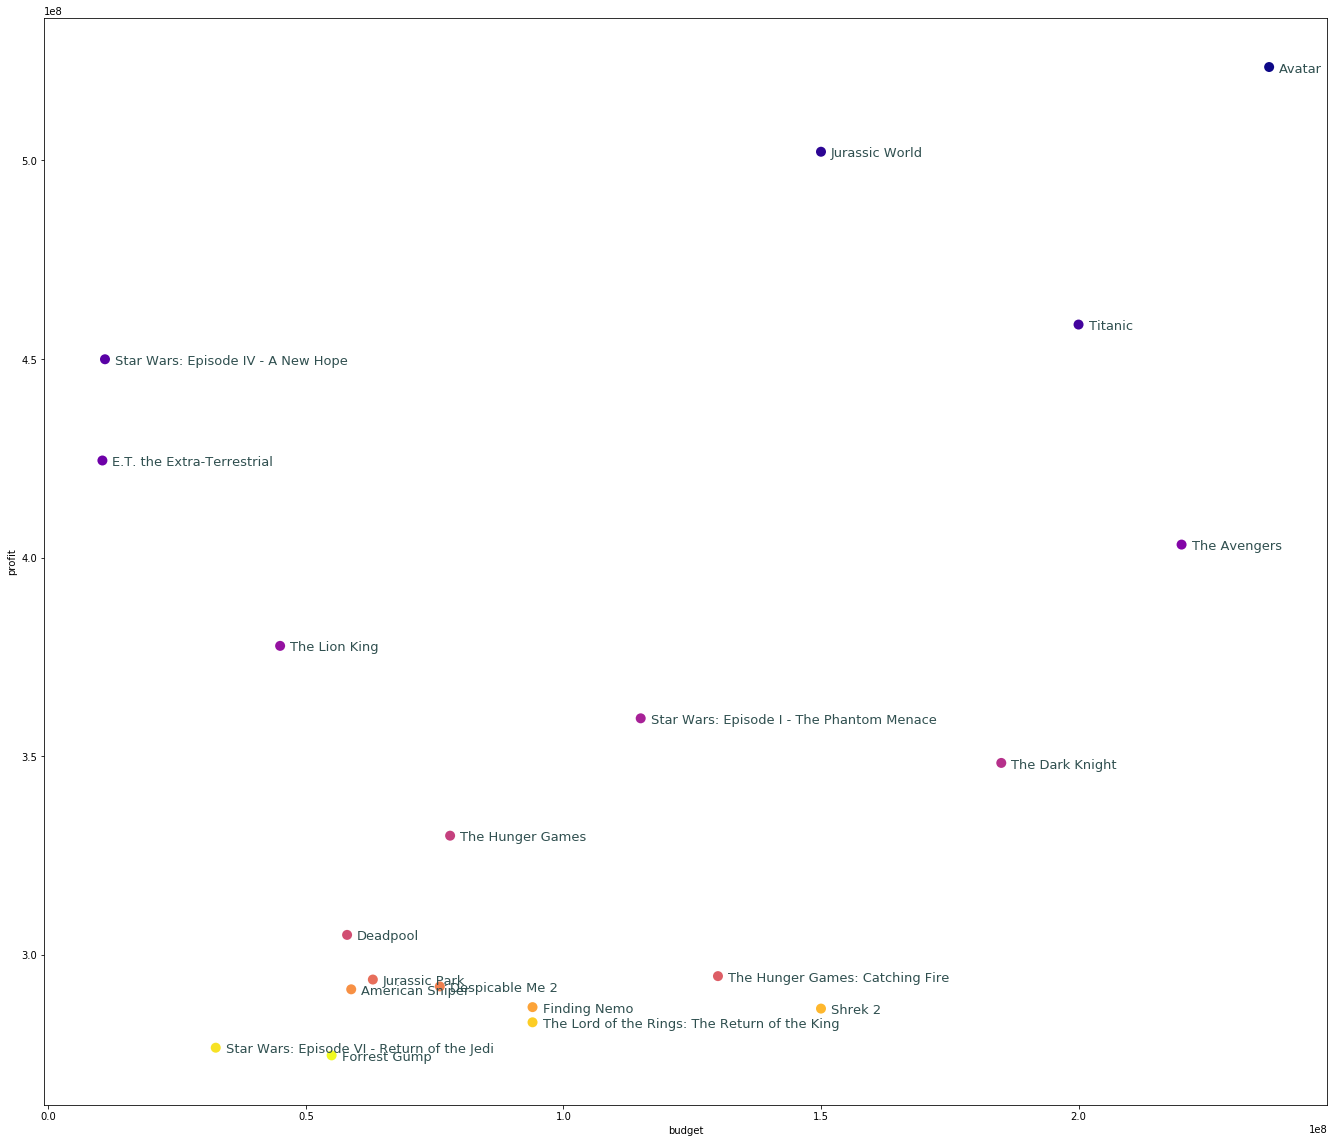

In [62]:
fig, ax = plt.subplots(1,1,figsize=(23,20))
top20profit.plot('budget', 'profit', kind='scatter', ax=ax, s=100, linewidth=0, c=range(20), colormap="plasma", colorbar=False);

for k in range(20):
    ax.annotate(top20profit.loc[k,'movie_title'], top20profit.loc[k,['budget','profit']],
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=13, color='darkslategrey')

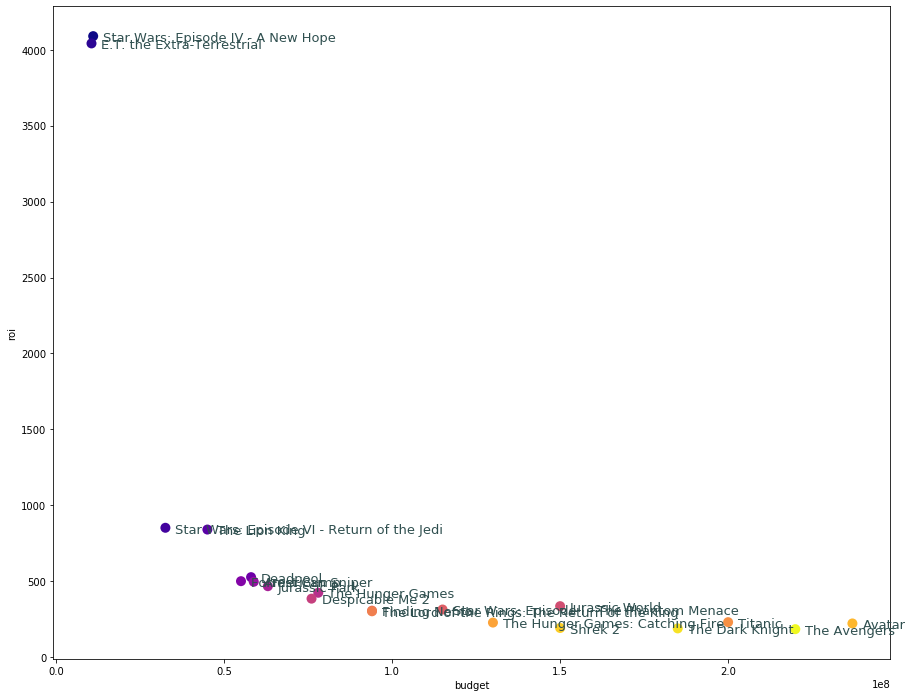

In [63]:
#Retour sur investissement du top20 des profits
top20profit['roi'] = top20profit.profit/top20profit.budget*100
top20profit = top20profit.sort_values('roi', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots(1,1,figsize=(15,12))
top20profit.plot('budget', 'roi', kind='scatter', ax=ax, s=100, linewidth=0, c=range(20), colormap="plasma", colorbar=False);
for k in range(20):
    ax.annotate(top20profit.loc[k,'movie_title'], top20profit.loc[k,['budget','roi']],
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=13, color='darkslategrey')

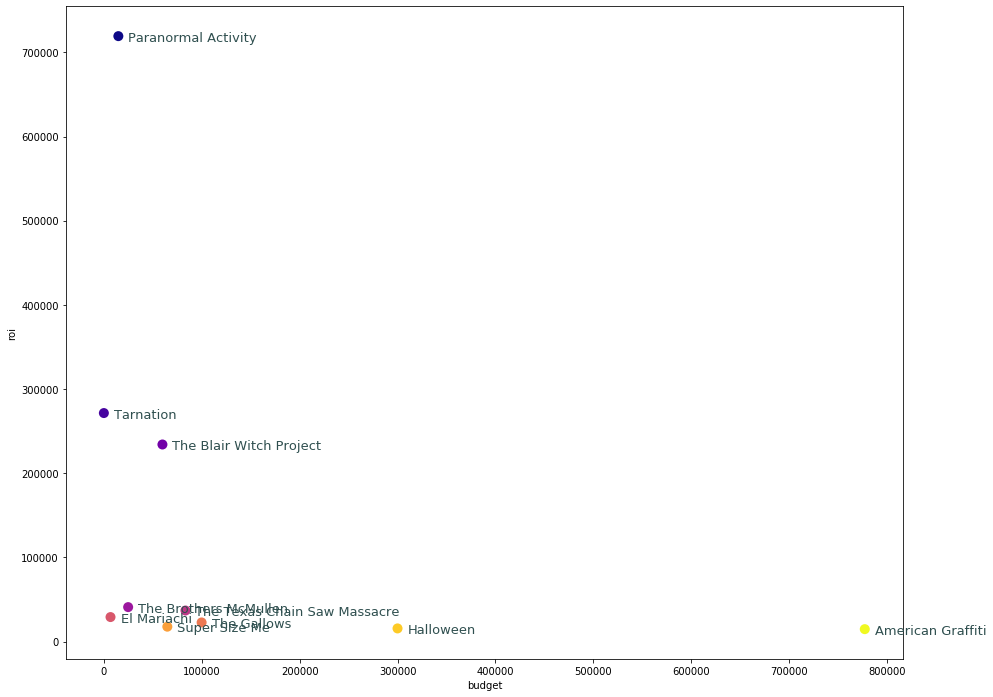

In [64]:
#Top 10 des films ayant les meilleurs retour sur investissement
data['roi'] = data.profit/data.budget*100
top10roi = data[['movie_title', 'roi', 'budget']].sort_values('roi', ascending=False).iloc[:10].reset_index(drop=True)

fig, ax = plt.subplots(1,1,figsize=(15,12))
top10roi.plot('budget', 'roi', kind='scatter', ax=ax, s=100, linewidth=0, c=range(10), colormap="plasma", colorbar=False);
for k in range(10):
    ax.annotate(top10roi.loc[k,'movie_title'], top10roi.loc[k,['budget','roi']],
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=13, color='darkslategrey')

In [65]:
#Top 20 des réalisateurs ayant les meilleurs notes IMDB et leur nombre de films dans la base
directors = data[['director_name', 'imdb_score', 'movie_title']].groupby('director_name').agg({'imdb_score':'mean', 'movie_title':'count'})
top20real = directors.sort_values('imdb_score', ascending=False).iloc[:20]
top20real

,imdb_score,movie_title
director_name,,
Akira Kurosawa,8.700,1
Charles Chaplin,8.600,1
Michael Curtiz,8.600,1
Tony Kaye,8.600,1
Damien Chazelle,8.500,1
Majid Majidi,8.500,1
Ron Fricke,8.500,1
Sergio Leone,8.475,4
Christopher Nolan,8.425,8


## **5. Pré-traitement**

**À FAIRE**

>Maintenant que vous commencez à bien connaître votre base de données, on va la préparer pour la partie modélisation.
>
>Sont donc attendus dans cette partie :
>- restriction aux données utiles à la prédiction : potentiellement certaines variables conservées pour la visualisation sont à supprimer pour la modélisation
>- création des échantillons d'entraînement et de test
>- gestion des variables catégoriques d'un côté et numériques de l'autre
>
>La standardisation n'étant pas toujours nécessaire puisque ça dépend des modèles, vous pouvez choisir de la faire dès maintenant ou bien d'attendre de voir si vous en avez besoin...

## **6. Une régression linéaire**

**À FAIRE**

>Tout est dans le titre. Vous devez ici entraîner et tester une régression linéaire pour la prédiction de la note IMDB.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des coefficients et de leur significativité
>- le choix d'une mesure d'évaluation du modèle et son interprétation
>- une validation croisée pour l'estimation de la qualité du modèle
>- *facultatif : l'ajout d'une régularisation Ridge ou Lasso pour déterminer si les résultats sont meilleurs*

## **7. Un autre modèle de régression**

**À FAIRE**

>Tout est encore dans le titre. Mettez en place le modèle **de régression** que vous souhaitez.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle avec `cross_val_score`
>- affinage des éventuels hyperparamètres avec `GridSearchCV`

## **8. De la régression à la classification**

**À FAIRE**

>Transformez le problème de régression en un problème de classification par une discrétisation du score IMDB en 5 classes : nul, bof, sympa, bon, super.  
>Justifiez votre découpage en indiquant quels seuils vous avez utilisé et pourquoi.

## **9. Une régression logistique**

**À FAIRE**

>Vous devez ici entraîner et tester une régression logistique pour la prédiction de la classe du film.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des *Odds-ratio* et de leur significativité
>- le choix d'une ou plusieurs mesures d'évaluation du modèle et leur interprétation
>- une validation croisée pour l'évaluation modèle
>- l'affinage des hyperparamètres avec l'outil qui va bien
>- peut-on tracer les courbes ROC et calculer l'AUC ? Pourquoi ?

## **10. Un autre modèle de classification**

**À FAIRE**

>Au choix, une autre méthode de classification. Évidemment, sentez-vous libre d'en essayer plus d'une et de les comparer.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle
>- étude de l'importance des paramètres, si votre modèle le permet
>- affinage des éventuels hyperparamètres

## **11. En option**

Bravo, si vous êtes arrivés jusqu'ici !!!

Pour les flèches, hésitez pas à continuer si vous en voulez encore et pour les autres, hésitez pas à y revenir à l'occasion.

### **11.1. Un outil de recommandation**

**À FAIRE**

>Question un peu plus ouverte pour terminer: en utilisant une méthode de clustering (donc d'apprentissage non-supervisé), construisez un petit outil de recommandation de films.  
>Pour un film donné, votre méthode doit donc retourner les films qui lui ressemblent le plus.  
>Pour rappel, on avait fait un petit exercice comme celui-cilorsqu'on avait vu les *k-plus proches voisins*, donc vous êtes invités à ne pas utiliser kNN, sinon c'est pas drôle...  
>Vous pourrez bientôt aller plus loin en créant une petite application web permettant une interface pour choisir un film.

### **11.2. Sauvegarder un modèle**

**À FAIRE**

>Utilisez le module `pickle` pour sauvegarder le meilleur de vos modèles et le recharger ensuite.

### **11.3. Analyse en Composantes Principales**

**À FAIRE**

>Utilisez une ACP pour visualiser vos données en dimension 2 ou 3 avec des points dont la couleur varie en fonction de la classe.  